<a href="https://colab.research.google.com/github/gmae199boy/ai_deeplearning/blob/main/ai_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 학습하는 연습장

- 현재 인프런에서 딥러닝 문제 풀이중 https://www.inflearn.com/course/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%9E%85%EB%AC%B8/lecture/63678?tab=curriculum 

- EBS에서 제공하는 무료 pdf 강의는 나중에 수학 기초를 볼 때 보는 것이 좋아보임.


---

## 학습 내용

- 산전도: 점으로만 그려진 그래프

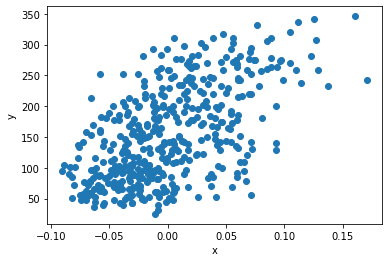

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diabetes = load_diabetes()

x = diabetes.data[:,2]
y = diabetes.target

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



- 선형 회귀법: 보통 학교에서 방정식을 풀라고 하면 기울기와 절편을 주고 x, y를 구하라는 문제풀이가 보통이지만, 회귀법은 주어지는 x, y를 가지고 기울기와 절편을 구하는 것이다. 선형 회귀는 1차 방정식이 선이라서 선형인 것.
  - 경사 하강법을 통해 회귀문제를 품  
  - 위의 그래프에 직선을 그리는데, 가장 알맞는 직선을 찾기 위해 경사 하강법을 사용함.

- 경사 하강법: 딥러닝에서 주로 사용하는 문제 풀이법
  1. 무작위로 w(가중치)와 b(절편)을 정함 (무작위로 모델 만들기)
  2. x에서 샘플 하나를 선택하여 y헷지를 계산 (무작위로 모델 예측하기)
  3. y헷지와 선택한 샘플의 진짜 y를 비교 (예측한 값과 진짜 정답 비교, 틀릴확률 99%)
  4. y헷지가 y와 더 가까워지도록 w, b를 조정 (모델 조정하기)
  5. 모든 샘플을 처리할 때 까지 다시 2~4 항목을 반복


In [ ]:
w = 1.0
b = 1.0

y_hat = x[0] * w + b
print(y_hat)
print(y[0])

1.0616962065186886
151.0


In [ ]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) // 변화율
print(w_rate)

0.061696206518688734


  6. 가중치를 0.1 증가시켰더니 y헷지가 타깃에 조금 더 가까워졌다. 그러므로 w를 0.1 증가시킨 것은 ***올바른*** 결정이다
  7. 변화율(***w_rate == x***)은 x[0]그 자체이다. 변화율을 보고 w를 어떻게 바꾸어야 할지 알 수 있나? 
    - 변화율이 양수면 y헷이 증가한다
      - y에 y_hat을 넣고 x에 w를 넣은 그래프를 보면 w가 증가하면 할수록 y_hat이 증가한다
    - 변화율이 음수면 y헷이 감소한다
      - 위와 반대로 w가 감소하면 y_hat이 증가한다

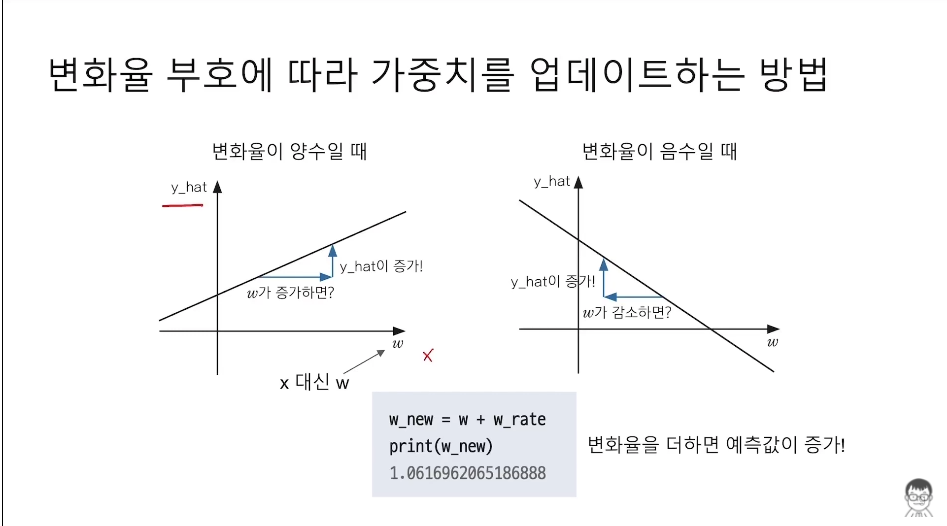

  - w_rate은 x인데 음수건 양수건 더하기만 하면 예측값이 증가하게 된다(음수를 더하면 빼기가 되니까)
    - w_rate만 계속 더하면 된다
8. 